In [ ]:
import pickle
def save_model(model,name):
    with open(MODEL_FOLDER + name + '.pkl', 'wb') as handle:
        pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

def save_best_model(model,name):
    with open(MODEL_FOLDER + name + '.pkl', 'wb') as handle:
        pickle.dump(model.best_estimator_, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def open_model(name):
    with open(MODEL_FOLDER + name + '.pkl', 'rb') as handle:
        return pickle.load(handle)

In [39]:
import pandas as pd
import pickle
import os


In [30]:
def save_fig(sec_name, fig_name, tight_layout=True,dpi=600):
    path = os.path.join(FIG_FOLDER , sec_name + '_'  + fig_name + ".png")
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=dpi)

In [41]:
DATA_FOLDER = '../data/'
FIG_FOLDER = '../figures/'

# Future Work

* Impruve the model metric and tuning 
* test stacking models
* test other resampling methodes
* try to keep id connection through the process to calc the indvitual miss classifcation financial damage

* develope a int. rate calc function based on model output and binary corss entropy

* model save fucntion seems not work always improve

# Conclusion


# Summery

In [35]:
df_model_comp = pd.read_pickle(DATA_FOLDER + 'model_evaluation_df_backup1.pkl')
df_model_comp.head()

,log_reg_1,naive_bayes,bagging_lr,grad_boost,rfc_gridsearch,rfc,AdaLog,Ada_rfc,xgboos_1,xgboos_2,xgboost_strat
base recall,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
test recall,0.578555,0.960436,0.575688,0.502294,0.567087,0.502867,0.534977,0.577982,0.824541,0.586009,1.000000
train recall,0.574831,0.970320,0.579437,0.511168,0.622371,0.499957,0.518512,0.586824,0.853294,0.562967,1.000000
base precision,0.150267,0.150267,0.150267,0.150267,0.150267,0.150267,0.150267,0.150267,0.150267,0.150267,0.150267
test precision,0.232381,0.151983,0.231390,0.241522,0.237398,0.239225,0.197335,0.232902,0.189710,0.191853,0.150267


In [21]:
df_model_comp.head()
df_model_comp.index


Index(['base  recall', 'test  recall', 'train recall', 'base  precision',
       'test  precision', 'train precision', 'base  ROC-AUC', 'test  ROC-AUC',
       'train ROC-AUC', 'base  f1', 'test  f1', 'train f1', 'base  fb=0.5',
       'test  fb=0.5', 'train fb=0.5', 'base  accuracy', 'test  accuracy',
       'train accuracy', 'base  log loss', 'test  log loss', 'train log loss',
       'train rate truth', 'test  rate truth', 'train rate pred.',
       'test  rate pred.', 'train entopy truth', 'test  entopy truth',
       'train entopy pred.', 'test  entopy pred.', 'TN - good', 'TP - bad',
       'FP - lost', 'FN - missed'],
      dtype='object')

In [36]:
df_model_comp[['log_reg_1','AdaLog','rfc_gridsearch','xgboos_1']].loc[['test  recall']]

,log_reg_1,AdaLog,rfc_gridsearch,xgboos_1
test recall,0.578555,0.534977,0.567087,0.824541


Saving figure test_recall


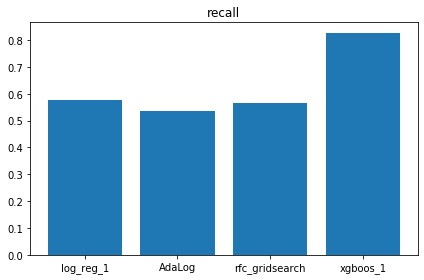

Saving figure test_ROCAUC


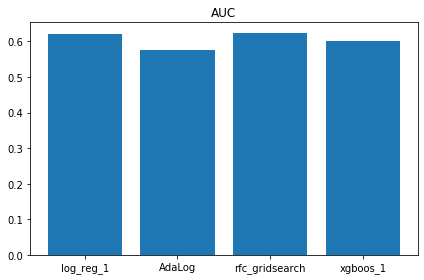

Saving figure member_loss


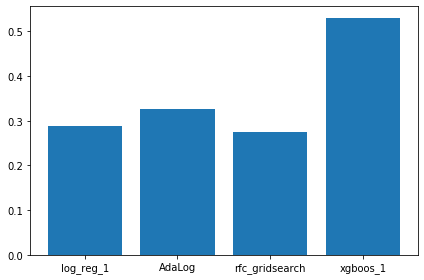

In [49]:
import matplotlib.pyplot as plt
d_temp = df_model_comp[['log_reg_1','AdaLog','rfc_gridsearch','xgboos_1','rfc_gridsearch']].loc[['test  recall' ,'FP - lost', 'test  ROC-AUC'],:]


plt.bar(d_temp.columns, d_temp.loc[['test  recall'],:].squeeze())
plt.title('recall')
save_fig('model_select', 'test_recall', tight_layout=True,dpi=600)
plt.show()
plt.title('AUC')
plt.bar(d_temp.columns, d_temp.loc[['test  ROC-AUC'],:].squeeze())
#plt.plot([],[])
save_fig('model_select', 'test_ROCAUC', tight_layout=True,dpi=600)
plt.show()

plt.bar(d_temp.columns, d_temp.loc[['FP - lost'],:].squeeze()/11606)
save_fig('model_select', 'member_loss', tight_layout=True,dpi=600)

In [28]:
d_temp.loc[['test  recall'],:].squeeze()

log_reg_1         0.578555
AdaLog            0.534977
rfc_gridsearch    0.567087
Name: test  recall, dtype: float64